In [142]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly
import plotly.graph_objects as go



In [143]:
transactions = pd.read_csv('../data/acct_transactions.csv', delimiter = ',', index_col=0)
transactions

,tran_amt,principal_amt,interest_amt,new_balance
0,0.024780,0.027362,-0.172302,1.473768
1,0.024780,0.027362,-0.172302,-0.146869
2,-0.287262,-0.286364,-0.172302,1.504441
3,0.024300,0.026880,-0.172302,-0.160969
4,0.024780,0.027362,-0.172302,-0.153326
...,...,...,...,...
77575,-0.281313,-0.280383,-0.172302,-0.220415
77576,-0.275524,-0.274563,-0.172302,0.117090
77577,-0.008321,-0.005917,-0.172302,-0.259948
77578,-1.330588,-1.335319,-0.172302,-0.189580


In [144]:
# define k-means
# kmeans first

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

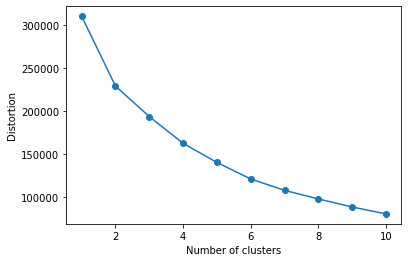

In [145]:
plot_distortion(transactions)
# looks like 5 is the winner

In [146]:
# set up k_means params
km = KMeans(n_clusters=3,
            n_init=10,
            random_state=0)

In [147]:
# fit and predict
y_km = km.fit_predict(transactions)
y_km

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [148]:
transactions['cluster'] = y_km
transactions

,tran_amt,principal_amt,interest_amt,new_balance,cluster
0,0.024780,0.027362,-0.172302,1.473768,1
1,0.024780,0.027362,-0.172302,-0.146869,1
2,-0.287262,-0.286364,-0.172302,1.504441,1
3,0.024300,0.026880,-0.172302,-0.160969,1
4,0.024780,0.027362,-0.172302,-0.153326,1
...,...,...,...,...,...
77575,-0.281313,-0.280383,-0.172302,-0.220415,1
77576,-0.275524,-0.274563,-0.172302,0.117090,1
77577,-0.008321,-0.005917,-0.172302,-0.259948,1
77578,-1.330588,-1.335319,-0.172302,-0.189580,1


In [152]:
radar_scaled = transactions.groupby('cluster').mean()
radar_scaled


,tran_amt,principal_amt,interest_amt,new_balance
cluster,,,,
0,2.615066,2.625258,0.277218,0.409089
1,-0.157144,-0.156534,-0.102585,-0.008384
2,2.855143,2.762373,7.605159,-0.930050


In [150]:
def plotRadarChart(data,title):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i,:4].values,
                                        theta=data.columns[:4],
                                        name=str(data.index[i]),
                                        fill='toself'
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True, title=title)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

In [151]:
plotRadarChart(radar_scaled, "Transaction segments")